## Loading libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/gabriel/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Loading the dataset 

In [2]:
path = '/home/gabriel/share/Prestashop/'
data = pd.read_csv(path+"Prestashop_Ready_dataset.csv")

## 1. Data wrangling

### 1.a Main statistics 

In [3]:
data.head(5)

,Merchant_ID,Merchant_Country,Merchant_Language,Merchant_Creation_Timestamp,Merchant_Subscription_Timestamp,Merchant_Days_To_Subscribe,Merchant_Hours_To_Subscribe,Merchant_End_Trial,Merchant_Creation_Year,Merchant_Creation_Month,...,Shop_Bo_Connections_Last_30_Days,Shop_Orders_Count,Shop_Orders_Count_Last_7_Days,Shop_Orders_Count_Last_30_Days,Shop_Last_Order_Date,Shop_Gross_Sales,Shop_Gross_Sales_Last_7_Days,Shop_Gross_Sales_Last_30_Days,Shop_Last_Logo_Change_Date,Shop_Last_Favicon_Change_Date
0,2535,fr,fr,2017-12-11 01:51:08.000000 UTC,NaN,NaN,NaN,2018-01-10,2017,December,...,15.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,20171212.0,20171212.0
1,2523,fr,fr,2017-12-07 21:10:47.000000 UTC,2017-12-10 19:07:52.000000 UTC,2.0,69.0,2018-01-06,2017,December,...,41.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,20171208.0,NaN
2,2414,fr,fr,2017-12-07 15:11:28.000000 UTC,2017-12-08 11:07:49.000000 UTC,0.0,19.0,2018-01-06,2017,December,...,25.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,20171208.0,NaN
3,2398,fr,fr,2017-12-07 22:22:39.000000 UTC,2017-12-07 23:07:46.000000 UTC,0.0,0.0,2018-01-06,2017,December,...,43.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,20171208.0,NaN
4,2329,fr,fr,2017-12-06 13:53:36.000000 UTC,NaN,NaN,NaN,2018-01-05,2017,December,...,22.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,20171211.0,20171211.0


In [4]:
a,b = data.shape
print('Number of merchants '+str(a))
print('Number of features '+str(b))

Number of merchants 2089
Number of features 43


In [5]:
print('Data type of each column: ')
data.dtypes

Data type of each column


Merchant_ID                                int64
Merchant_Country                          object
Merchant_Language                         object
Merchant_Creation_Timestamp               object
Merchant_Subscription_Timestamp           object
Merchant_Days_To_Subscribe               float64
Merchant_Hours_To_Subscribe              float64
Merchant_End_Trial                        object
Merchant_Creation_Year                     int64
Merchant_Creation_Month                   object
Merchant_Creation_Day_Of_Week             object
Merchant_Creation_Time                    object
Merchant_Creation_Time_Period             object
Merchant_Billing_Country                  object
Merchant_Billing_City                     object
Merchant_Billing_Zip                      object
Merchant_Plan_Offer                       object
Merchant_Plan_Periodicity                 object
Shop_Status                               object
Shop_Name                                 object
Shop_ID             

In [7]:
print('Merchants with more than one e-shop')
print(data['Merchant_ID'].duplicated().sum())

Merchants with more than one e-shop
0


In [9]:
print('Churn ratio before the end of the trial period: ')
print(data[(data['Shop_Status']=='disabled') & (data['Shop_Existence_Days']<30)]['Merchant_ID'].count()/a)

Churn ratio before the end of the trial period: 
0.0


In [11]:
print('Merchant plan offer distribution: ')
print(data['Merchant_Plan_Offer'].value_counts())

Merchant plan offer distribution: 
Trial    2037
Start      52
Name: Merchant_Plan_Offer, dtype: int64


### 1.b Filterning the data 

In [4]:
df = data[(data['Shop_Existence_Days']>=30) & (data['Shop_Status']=='disabled') | (data['Merchant_Plan_Offer']=='Start')]
trial, start = df['Merchant_Plan_Offer'].value_counts()
print('Interest merchant plan offer distribution: ')
print('Trial: '+str(trial))
print('Start: '+str(start))

Interest merchant plan offer distribution: 
Trial: 521
Start: 52


In [5]:
print("Percentage of merchants not churning: %s %%" % "{0:.3}".format(100*start/(start+trial)))

Percentage of merchants not churning: 9.08 %


In [6]:
df = df.reset_index(drop=True)

### 1.c Adding engineering features 

In [7]:
# Engineering features
df['Shop_Existence_Days_Corrected'] = df['Shop_Existence_Days']
df['Shop_Existence_Days_Corrected'].iloc[df[df['Merchant_Plan_Offer']=='Trial'].index] = 30
df['Shop_Gross_Sales_Ratio'] = df['Shop_Gross_Sales']/df['Shop_Existence_Days_Corrected']
df['Shop_Bo_Connections_Ratio'] = df['Shop_Bo_Connections']/df['Shop_Existence_Days_Corrected']
df['Shop_Orders_Count_Ratio'] = df['Shop_Orders_Count']/df['Shop_Existence_Days_Corrected']

/home/gabriel/.local/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
# add more variables
var_num = ['Shop_Products_Count','Shop_Bo_Connections_Ratio','Shop_Orders_Count_Ratio',
           'Shop_Gross_Sales_Ratio','Shop_Shipping_Methods_Count']
var_cat = ['Merchant_Country','Merchant_Language','Shop_Status']                                                      

In [9]:
#convert all categorical variables into numeric by encoding the categories
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in var_cat:
    df[i] = le.fit_transform(df[i])

In [10]:
df_selection = df[var_num+var_cat]

### 1.d Cleaning data 

In [11]:
# drop rows with NaN
df_selection = df_selection.dropna(how='any') 

### 1.e Final data description 

In [75]:
df_selection.describe()

,Shop_Products_Count,Shop_Bo_Connections_Ratio,Shop_Orders_Count_Ratio,Shop_Gross_Sales_Ratio,Shop_Shipping_Methods_Count,Merchant_Country,Merchant_Language,Shop_Status
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,8.606643,0.293350,0.001869,0.218881,1.054196,1.508741,1.501748,0.910839
std,124.263536,0.838549,0.012529,2.708320,0.281726,0.616408,0.633283,0.285225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033333,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.066667,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.200000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000
max,2929.000000,8.600000,0.133333,57.499667,4.000000,3.000000,3.000000,1.000000


In [12]:
print("Number of merchants for each class: ")
disabled, active = df_selection['Shop_Status'].value_counts()
print("Disabled accounts: "+str(disabled))
print("Active/Created accounts: "+str(active))

Number of merchants for each class: 
Disabled accounts: 521
Active/Created accounts: 51


## 2. Data analysis and classifier construction 

In [13]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [14]:
y = df_selection['Shop_Status'] 
X = df_selection.drop('Shop_Status',axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=123,stratify=y)

In [76]:
# scale data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# General testing function measuring the performance of the predictor on the test dataset
def classification_model(model, input_train, output_train, input_test, output_test):
    #Fit the model:
    model.fit(input_train,output_train)
  
    #Make predictions on train and test datasets:
    predictions_train = model.predict_proba(input_train)
    predictions_test = model.predict_proba(input_test)
  
    #Print scoring
    auc = roc_auc_score(output_train, predictions_train[:,1])
    print ("Train data scoring (AUC-ROC): %s" % "{0:.3}".format(auc))
    
    auc = roc_auc_score(output_test, predictions_test[:,1])
    print ("Test data scoring (AUC-ROC): %s" % "{0:.3}".format(auc))

### SVM classifier 

In [78]:
svc = SVC(class_weight='balanced', probability = True)

In [79]:
classification_model(svc, X_train_scaled, 1-y_train, X_test_scaled, 1-y_test)

Train data scoring (AUC-ROC): 0.91
Test data scoring (AUC-ROC): 0.756


### Logistic regression 

In [80]:
logreg = LogisticRegression(class_weight='balanced') 

In [81]:
classification_model(logreg, X_train_scaled, 1-y_train, X_test_scaled, 1-y_test)

Train data scoring (AUC-ROC): 0.907
Test data scoring (AUC-ROC): 0.717


### Decision tree

In [82]:
dtc = DecisionTreeClassifier(max_depth=4,class_weight = 'balanced')

In [83]:
classification_model(dtc, X_train_scaled, 1-y_train, X_test_scaled, 1-y_test)

Train data scoring (AUC-ROC): 0.979
Test data scoring (AUC-ROC): 0.956


### Random forest classifier 

In [98]:
rfc = RandomForestClassifier(class_weight = 'balanced', random_state=0)

In [99]:
classification_model(rfc, X_train_scaled, 1-y_train, X_test_scaled, 1-y_test)

Train data scoring (AUC-ROC): 0.997
Test data scoring (AUC-ROC): 0.807


In [100]:
print('Features importances:')
rfc_imp = rfc.feature_importances_
features_names = var_num + var_cat
for i in range(0,len(rfc_imp)):
    print (features_names[i]+": %s" % "{0:.1}".format(rfc_imp[i]))

Features importances:
Shop_Products_Count: 0.2
Shop_Bo_Connections_Ratio: 0.7
Shop_Orders_Count_Ratio: 0.02
Shop_Gross_Sales_Ratio: 0.02
Shop_Shipping_Methods_Count: 0.02
Merchant_Country: 0.03
Merchant_Language: 0.03


## 3. Model comparison 

In [101]:
predictions_proba_svc = svc.predict_proba(X_test_scaled)
predictions_proba_dtc = dtc.predict_proba(X_test_scaled)
predictions_proba_rfc = rfc.predict_proba(X_test_scaled)

In [102]:
pre_svc, rec_svc, thr_svc= metrics.precision_recall_curve(1-y_test, predictions_proba_svc[:,1])
pre_dtc, rec_dtc, thr_dtc= metrics.precision_recall_curve(1-y_test, predictions_proba_dtc[:,1])
pre_rfc, rec_rfc, thr_rfc= metrics.precision_recall_curve(1-y_test, predictions_proba_rfc[:,1])

Text(0.5,1,'Precision vs Recall curve for various models')

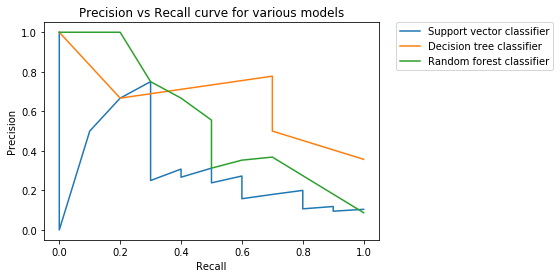

In [103]:
# plot various precision and recall curves for each model
plt.plot(rec_svc,pre_svc,label="Support vector classifier")
plt.plot(rec_dtc,pre_dtc,label="Decision tree classifier")
plt.plot(rec_rfc,pre_rfc,label="Random forest classifier")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall curve for various models')

### Best model performances (Decision tree) 

In [104]:
predictions = dtc.predict(X_test_scaled)
print("Train data scoring (F1) : %s" % "{0:.3}".format(metrics.f1_score(1-y_test, predictions)))
print("Train data scoring (Precision) : %s" % "{0:.3}".format(metrics.precision_score(1-y_test, predictions)))
print("Train data scoring (Recall) : %s" % "{0:.3}".format(metrics.recall_score(1-y_test, predictions)))
print('Confusion matrix')
print(metrics.confusion_matrix(1-y_test, predictions))

Train data scoring (F1) : 0.583
Train data scoring (Precision) : 0.5
Train data scoring (Recall) : 0.7
Confusion matrix
[[98  7]
 [ 3  7]]


In [ ]:
export_graphviz(dtc,out_file='tree.dot')